In [1]:
#Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#prophet library
from prophet import Prophet
from prophet.diagnostics import cross_validation
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
# Read the CSV file
df = pd.read_csv('filled_close_only.csv')

In [3]:
df

,Unnamed: 0,Close
0,2019-06-01,11.931333
1,2019-06-02,11.931333
2,2019-06-03,11.931333
3,2019-06-04,12.906667
4,2019-06-05,13.106000
...,...,...
1822,2024-05-27,179.240005
1823,2024-05-28,176.750000
1824,2024-05-29,176.190002
1825,2024-05-30,178.789993


In [4]:
# Rename columns
new_column_names = {
    'Unnamed: 0': 'ds',
    'Close': 'y',
}
df = df.rename(columns=new_column_names)

# Renaming new DataFrame with new column names
df.to_csv('filled_close_only_newcolumns.csv', index=False)

In [5]:
df.head()

,ds,y
0,2019-06-01,11.931333
1,2019-06-02,11.931333
2,2019-06-03,11.931333
3,2019-06-04,12.906667
4,2019-06-05,13.106000


In [6]:
m = Prophet()
m.fit(df)

01:01:10 - cmdstanpy - INFO - Chain [1] start processing
01:01:11 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2187,2025-05-27
2188,2025-05-28
2189,2025-05-29
2190,2025-05-30
2191,2025-05-31


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2187,2025-05-27,109.842157,-51.246021,261.227035
2188,2025-05-28,110.637415,-51.949281,261.975342
2189,2025-05-29,110.787456,-47.524603,263.292993
2190,2025-05-30,111.383966,-49.828348,256.160264
2191,2025-05-31,112.299535,-50.644218,268.025402


Text(83.34722222222221, 0.5, 'Stock Price (USD)')

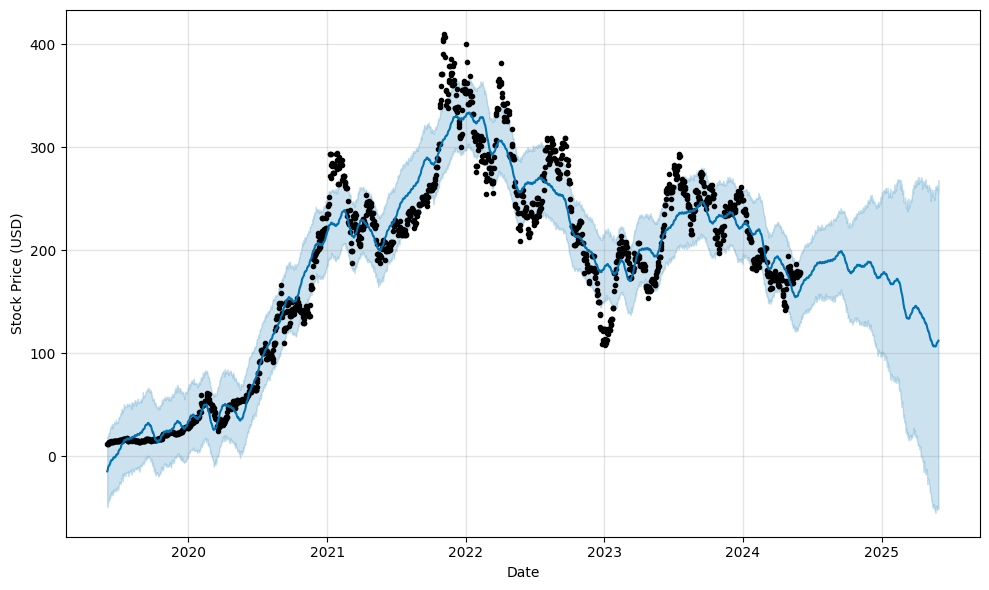

In [9]:
fig1 = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')

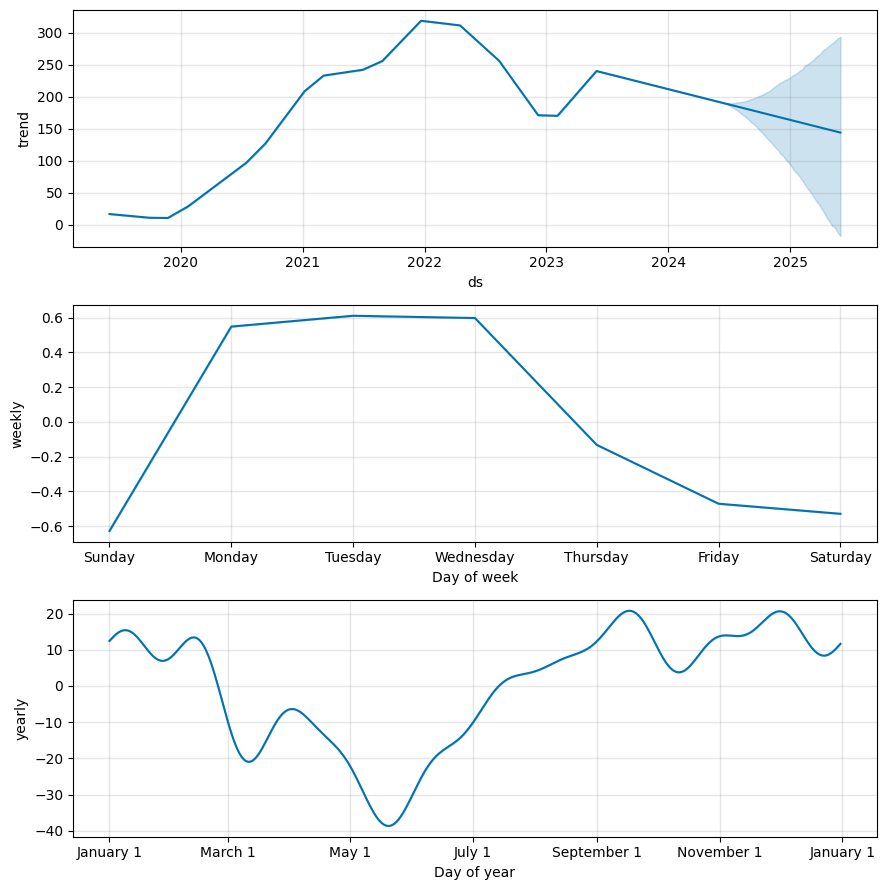

In [10]:
fig2 = m.plot_components(forecast)

In [15]:
fig = plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

## Generated figure is found in folder as 'newplot.png'

In [12]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/5 [00:00<?, ?it/s]

01:01:28 - cmdstanpy - INFO - Chain [1] start processing
01:01:28 - cmdstanpy - INFO - Chain [1] done processing
01:01:29 - cmdstanpy - INFO - Chain [1] start processing
01:01:29 - cmdstanpy - INFO - Chain [1] done processing
01:01:30 - cmdstanpy - INFO - Chain [1] start processing
01:01:31 - cmdstanpy - INFO - Chain [1] done processing
01:01:31 - cmdstanpy - INFO - Chain [1] start processing
01:01:32 - cmdstanpy - INFO - Chain [1] done processing
01:01:33 - cmdstanpy - INFO - Chain [1] start processing
01:01:33 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-12,205.259386,193.851690,216.053951,203.296661,2021-06-11
1,2021-06-13,204.585224,193.202224,215.589102,203.296661,2021-06-11
2,2021-06-14,205.151855,193.914872,216.534678,205.896667,2021-06-11
3,2021-06-15,204.928314,193.731311,215.502406,199.786667,2021-06-11
4,2021-06-16,204.171435,192.712964,214.769867,201.623337,2021-06-11


In [16]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,7140.244999,84.499970,69.034989,0.335777,0.211562,0.320236,0.191209
1,38 days,7368.165293,85.838018,70.304300,0.342739,0.213857,0.325608,0.185714
2,39 days,7576.239183,87.041595,71.473511,0.348935,0.221303,0.330432,0.180220
3,40 days,7779.035934,88.198843,72.559686,0.354629,0.221303,0.334836,0.178022
4,41 days,7979.385492,89.327406,73.564679,0.360009,0.230005,0.338903,0.178022


In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')